In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter


In [ ]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('../data/korean_sentiment_dataset.csv')

# 데이터 기본 정보 출력
print("📊 데이터 기본 정보")
print(f"데이터 크기: {df.shape}")
print(f"컬럼명: {list(df.columns)}")
print("\n" + "="*50)
df.head()

📊 데이터 기본 정보
데이터 크기: (3000, 2)
컬럼명: ['text', 'label']



,text,label
0,그냥 사람들 앞에 서는 너무 무서워요 괜히입니다,1
1,솔직히 계속 가슴이 답답하고 조마조마해요입니다,1
2,작은 일에도 깜짝깜짝 놀라요 정말했어요,1
3,사실은 하루하루가 너무 힘들어요입니다,0
4,이상하게도 좋아하는 노래를 들으니 기분이 좋아졌어요 이유 없이싶어요,2


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\human-26\AppData\Local\Temp\ipykernel_12976\3196454508.py:29: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  plt.tight_layout()
C:\Users\human-26\AppData\Local\Temp\ipykernel_12976\3196454508.py:29: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  plt.tight_layout()
findfont: Font family 'AppleGothic' not found.
C:\Users\human-26\AppData\Local\Temp\ipykernel_12976\3196454508.py:29: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  plt.tight_layout()
C:\Users\human-26\AppData\Local\Temp\ipykernel_12976\3196454508.py:29: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  plt.tight_layout()
findfont: Font family 'AppleGothic' not found.
C:\Users\human-26\AppData\Local\Temp\ipykernel_12976\3196454508.py:29: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from

라벨별 개수 : 
우울: 1000개 (33.33%)
불안: 1000개 (33.33%)
정상: 1000개 (33.33%)

 전체 데이터: 3000개



findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANG

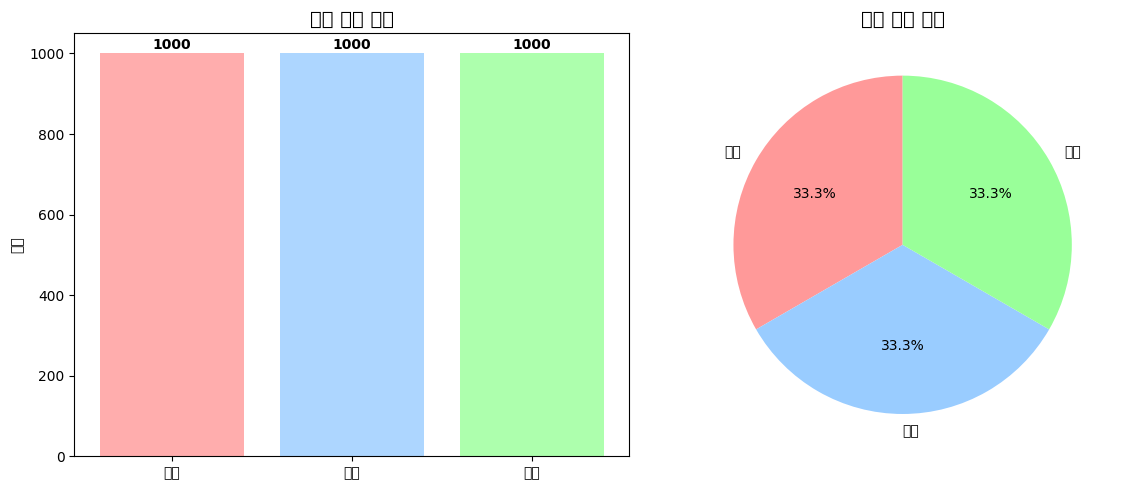


📊 데이터 균형성 분석:
최대/최소 비율: 1.00 (1.5 이하면 균형적)
✅ 비교적 균형잡힌 데이터입니다.


In [4]:
# 감정 라벨 분포 시각화
label_counts = df['label'].value_counts().sort_index()
print("라벨별 개수 : ")
for label, count in label_counts.items():
    emotion = ['우울', '불안', '정상'][label]
    percentage = (count / len(df)) * 100
    print(f"{emotion}: {count}개 ({percentage:.2f}%)")

print(f"\n 전체 데이터: {len(df)}개")
print("\n" + "="*50)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 5))

# 라벨별 개수 막대 그래프
labels = ['우울', '불안', '정상']
counts = [label_counts[i] for i in range(3)]
colors = ['#FF9999', '#99CCFF', '#99FF99']

ax1.bar(labels, counts, color=colors, alpha=0.8)
ax1.set_title('감정 라벨 분포', fontsize=14, fontweight='bold')
ax1.set_ylabel('개수')
for i, count in enumerate(counts):
    ax1.text(i, count + 10, str(count), ha='center', fontweight='bold')

# 파이 차트
ax2.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('감정 라벨 비율', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 데이터 균형성 체크
print("\n📊 데이터 균형성 분석:")
max_count = max(counts)
min_count = min(counts)
imbalance_ratio = max_count / min_count
print(f"최대/최소 비율: {imbalance_ratio:.2f} (1.5 이하면 균형적)")
if imbalance_ratio > 2:
    print("⚠️  데이터 불균형이 심합니다. 추후 샘플링 필요할 수 있습니다.")
else:
    print("✅ 비교적 균형잡힌 데이터입니다.")

In [5]:
# 간단한 데이터 샘플 확인
print("🔍 각 감정별 샘플 문장:")
print("="*50)
for label in range(3):
    emotion = ['우울', '불안', '정상'][label]
    samples = df[df['label'] == label]['text'].head(3).tolist()
    print(f"\n{emotion} 샘플:")
    for i, text in enumerate(samples, 1):
        print(f"  {i}. {text}")

🔍 각 감정별 샘플 문장:

우울 샘플:
  1. 사실은 하루하루가 너무 힘들어요입니다
  2. 가끔은 마음이 자꾸 가라앉고 어두워요 너무였어요
  3. 어느 순간부터 아무 이유 없이 눈물이 나요 너무였어요

불안 샘플:
  1. 그냥 사람들 앞에 서는 너무 무서워요 괜히입니다
  2. 솔직히 계속 가슴이 답답하고 조마조마해요입니다
  3. 작은 일에도 깜짝깜짝 놀라요 정말했어요

정상 샘플:
  1. 이상하게도 좋아하는 노래를 들으니 기분이 좋아졌어요 이유 없이싶어요
  2. 솔직히 커피 마시면서 여유를 즐겼어요하네요
  3. 솔직히 밥이 너무 맛있게 느껴졌어요 정말요


In [7]:
# 📊 데이터 증강 - 우울 관련 문장 추가
print("🔧 데이터 증강 시작...")
print("="*50)

# 기존 데이터 확인
print(f"기존 데이터 크기: {df.shape}")
print(f"우울 라벨 개수: {len(df[df['label'] == 0])}")

# 우울 관련 추가 데이터 (다양한 표현 방식 포함)
depression_data = [
    # 직접적인 우울 표현
    ("너무 우울해요", 0),
    ("우울하고 슬퍼요", 0),
    ("우울감이 심해요", 0),
    ("우울한 기분이에요", 0),
    ("오늘도 우울해요", 0),
    ("계속 우울한 상태예요", 0),
    ("우울증이 있는 것 같아요", 0),
    ("우울한 마음이 들어요", 0),
    ("매일 우울해요", 0),
    ("우울해서 힘들어요", 0),
    
    # 간접적인 우울 표현 (기존 패턴과 연결)
    ("우울하고 의욕이 없어요", 0),
    ("우울해서 아무것도 하기 싫어요", 0),
    ("우울하고 잠이 안 와요", 0),
    ("우울해서 혼자 있고 싶어요", 0),
    ("우울하고 사는 게 재미없어요", 0),
    ("우울해서 사람들이랑 얘기하고 싶지 않아요", 0),
    ("우울하고 슬퍼서 눈물이 나요", 0),
    ("우울감 때문에 힘들어요", 0),
    ("우울한 감정이 계속돼요", 0),
    ("우울해서 무기력해요", 0),
]

# 데이터프레임 생성
new_depression_df = pd.DataFrame(depression_data, columns=['text', 'label'])

# 기존 데이터와 합치기
enhanced_df = pd.concat([df, new_depression_df], ignore_index=True)

print(f"\n✅ 증강된 데이터 크기: {enhanced_df.shape}")
print(f"우울 라벨 개수: {len(enhanced_df[enhanced_df['label'] == 0])}")
print(f"추가된 문장 수: {len(new_depression_df)}")

# 새로운 균형성 확인
new_label_counts = enhanced_df['label'].value_counts().sort_index()
print(f"\n📊 증강 후 라벨 분포:")
for label, count in new_label_counts.items():
    emotion = ['우울', '불안', '정상'][label]
    percentage = (count / len(enhanced_df)) * 100
    print(f"{emotion}: {count}개 ({percentage:.2f}%)")

# 증강된 데이터 저장
enhanced_df.to_csv('../data/raw/enhanced_korean_sentiment_dataset.csv', index=False, encoding='utf-8')
print(f"\n💾 증강된 데이터 저장 완료: enhanced_korean_sentiment_dataset.csv")
print("이제 이 데이터로 모델을 재훈련해야 합니다!")

🔧 데이터 증강 시작...
기존 데이터 크기: (3000, 2)
우울 라벨 개수: 1000

✅ 증강된 데이터 크기: (3020, 2)
우울 라벨 개수: 1020
추가된 문장 수: 20

📊 증강 후 라벨 분포:
우울: 1020개 (33.77%)
불안: 1000개 (33.11%)
정상: 1000개 (33.11%)

💾 증강된 데이터 저장 완료: enhanced_korean_sentiment_dataset.csv
이제 이 데이터로 모델을 재훈련해야 합니다!
